In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import os
import kagglehub

# Download the CelebA dataset using kagglehub
jessicali9530_celeba_dataset_path = kagglehub.dataset_download('jessicali9530/celeba-dataset')
print('Data source import complete.')

# Importing scikit-learn tools for splitting and evaluating the dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Importing TensorFlow and Keras tools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalAveragePooling2D

# Print confirmation
print('Libraries imported successfully.')

BASIC_PATH = jessicali9530_celeba_dataset_path
IMG_PATH = os.path.join(BASIC_PATH, 'img_align_celeba/img_align_celeba')
FEATURE_PATH = os.path.join(BASIC_PATH, 'list_attr_celeba.csv')

LIST_ATTR_PATH = os.path.join(BASIC_PATH, 'list_attr_celeba.csv')
DF_ATTR = pd.read_csv(BASIC_PATH + '/list_attr_celeba.csv', delimiter=',')
DF_ATTR.set_index('image_id', inplace=True)
DF_ATTR.replace(to_replace=-1, value=0, inplace=True)

DF_PARTITION = pd.read_csv(BASIC_PATH + '/list_eval_partition.csv')

100%|██████████| 1.33G/1.33G [01:04<00:00, 22.1MB/s]

Extracting files...


Data source import complete.
Libraries imported successfully.


In [2]:
# prompt: hitung dan tampilkan jumlah total dataset diatas

total_dataset = DF_ATTR.shape[0]
print(f"Total dataset: {total_dataset}")

Total dataset: 202599


Contoh file duplikat:
188816.jpg
185901.jpg
187544.jpg
080543.jpg
069351.jpg
029535.jpg
074890.jpg
132489.jpg
Total file duplikat: 131


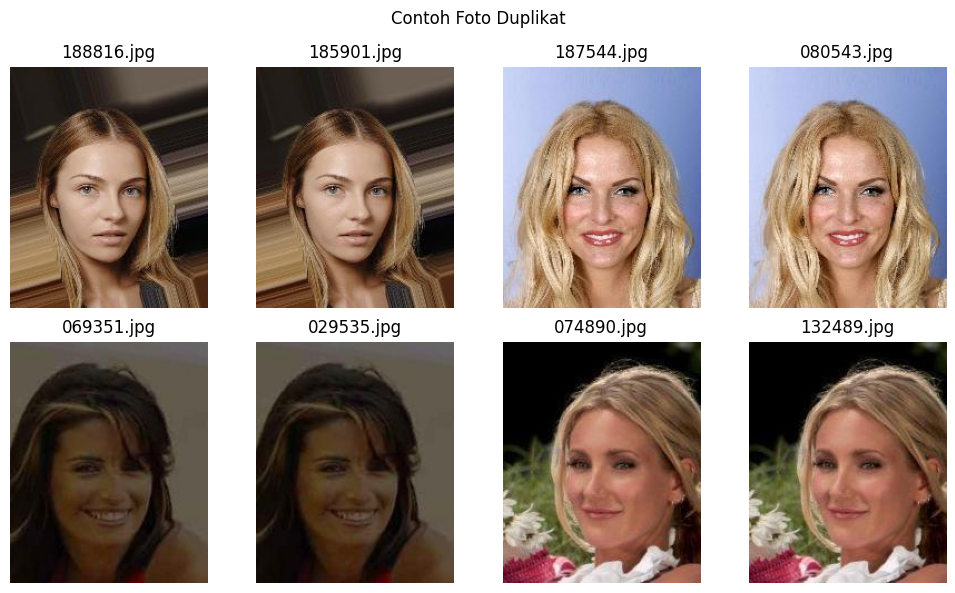

In [3]:
# Mengecek File Duplikat, Menghitung Jumlahnya dan Menampilkan 5 File Contoh
import hashlib
# Library yang digunakan : os dan hashlib

# Mencari semua file dengan ekstensi gambar dalam folder
image_files = [file for file in os.listdir(IMG_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Menggunakan dictionary untuk menyimpan hash nilai dan daftar file dengan hash yang sama
duplicate_files = {}

# Memeriksa setiap file gambar
for file_name in image_files:
    file_path = os.path.join(IMG_PATH, file_name)
    with open(file_path, 'rb') as f:
        file_hash = hashlib.md5(f.read()).hexdigest()

    if file_hash not in duplicate_files:
        duplicate_files[file_hash] = [file_name]
    else:
        duplicate_files[file_hash].append(file_name)

# Menghitung total file yang duplikat
total_duplicate_files = sum(len(files) - 1 for files in duplicate_files.values())

# Menampilkan 8 contoh nama file yang duplikat
print("Contoh file duplikat:")
count = 0
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        for file_name in file_list[:8]:
            count += 1
            print(file_name)
            if count == 8:
                break
    if count == 8:
        break

# Menampilkan total file yang duplikat
print(f"Total file duplikat: {total_duplicate_files}")

# Mengumpulkan 8 contoh file duplikat
duplicate_examples = []
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        duplicate_examples.extend(file_list[:8])
    if len(duplicate_examples) >= 10:
        break

# Menampilkan 8 foto duplikat dengan judul sebagai nama file
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(duplicate_examples):
        file_name = duplicate_examples[i]
        file_path = os.path.join(IMG_PATH, file_name)
        image = plt.imread(file_path)
        ax.imshow(image)
        ax.set_title(file_name)
        plt.suptitle('Contoh Foto Duplikat')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Code Modif dari Chat GPT

In [4]:
# Membuat List Nama File Foto untuk Join dengan Nama File pada File list_attribute.csv
import glob
# Library yang digunakan : glob dan pandas

# Tentukan pola nama file foto (misal: JPEG, PNG)
file_ekstensi = '*.jpg' # Ganti dengan ekstensi file gambar yang sesuai

# Tentukan direktori tempat file-file gambar berada
direktori_foto = IMG_PATH

# Mendapatkan list nama file
nama_file = glob.glob(direktori_foto + '/' + file_ekstensi)

# List nama file dijadikan dataframe
data = pd.DataFrame(nama_file, columns = ['image_id'])

# Menampilkan dataframe
data.head()

# Code Modif dari Chat GPT

,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [5]:
# Membuang karakter pertama hingga sebelum nama file
data['image_id'] = data['image_id'].str.split('\\').str[-1]
data.head()
# Note: menggunakan '\\' karena pemisah antar folder adalah '\'

# Code Modif dari Googling

,image_id
0,/root/.cache/kagglehub/datasets/jessicali9530/...
1,/root/.cache/kagglehub/datasets/jessicali9530/...
2,/root/.cache/kagglehub/datasets/jessicali9530/...
3,/root/.cache/kagglehub/datasets/jessicali9530/...
4,/root/.cache/kagglehub/datasets/jessicali9530/...


In [6]:
# Load Dataset 'list_attribute.csv' tampilkan juga nama file

print(f"File yang digunakan: {LIST_ATTR_PATH}")
df_attr = pd.read_csv(LIST_ATTR_PATH)
df_attr.head()

File yang digunakan: /root/.cache/kagglehub/datasets/jessicali9530/celeba-dataset/versions/2/list_attr_celeba.csv


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
# prompt: # Cek Informasi pada DataFrame

# Cek Informasi pada DataFrame DF_ATTR
print("Informasi DataFrame DF_ATTR:")
print(DF_ATTR.info())
print("\n")

# Cek Informasi pada DataFrame DF_PARTITION
print("Informasi DataFrame DF_PARTITION:")
print(DF_PARTITION.info())
print("\n")

# Deskripsi statistik DF_ATTR
print("Deskripsi Statistik DF_ATTR:")
print(DF_ATTR.describe())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_ATTR:")
print(DF_ATTR.isnull().sum())
print("\n")

# Melihat jumlah data missing per kolom
print("Jumlah Data Missing per Kolom DF_PARTITION:")
print(DF_PARTITION.isnull().sum())
print("\n")

# Melihat korelasi antar kolom pada DF_ATTR
print("Korelasi Antar Kolom DF_ATTR:")
print(DF_ATTR.corr())
print("\n")

# Melihat nilai unik pada kolom 'partition' di DF_PARTITION
print("Nilai Unik pada Kolom 'partition' di DF_PARTITION:")
print(DF_PARTITION['partition'].unique())
print("\n")

Informasi DataFrame DF_ATTR:
<class 'pandas.core.frame.DataFrame'>
Index: 202599 entries, 000001.jpg to 202599.jpg
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   5_o_Clock_Shadow     202599 non-null  int64
 1   Arched_Eyebrows      202599 non-null  int64
 2   Attractive           202599 non-null  int64
 3   Bags_Under_Eyes      202599 non-null  int64
 4   Bald                 202599 non-null  int64
 5   Bangs                202599 non-null  int64
 6   Big_Lips             202599 non-null  int64
 7   Big_Nose             202599 non-null  int64
 8   Black_Hair           202599 non-null  int64
 9   Blond_Hair           202599 non-null  int64
 10  Blurry               202599 non-null  int64
 11  Brown_Hair           202599 non-null  int64
 12  Bushy_Eyebrows       202599 non-null  int64
 13  Chubby               202599 non-null  int64
 14  Double_Chin          202599 non-null  int64
 15  Eyeglasses    

In [8]:
# prompt: # Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Inner Join antara Objek 'data' dengan Objek 'list_attribute'

# Gabungkan 'data' dan 'DF_ATTR' berdasarkan 'image_id'
merged_data = pd.merge(data, DF_ATTR, left_on='image_id', right_index=True, how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join:")
merged_data.head()

Hasil Inner Join:


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young


In [9]:
# prompt: # Cek Jumlah Baris dan kolom yang telah Join Inner

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(merged_data.shape)

Jumlah baris dan kolom setelah inner join:
(0, 41)


In [10]:
# prompt: # join the partition with the attributes

# Gabungkan 'merged_data' dan 'DF_PARTITION' berdasarkan 'image_id'
final_data = pd.merge(merged_data, DF_PARTITION, left_on='image_id', right_on='image_id', how='inner')

# Tampilkan hasil penggabungan
print("Hasil Inner Join antara merged_data dan DF_PARTITION:")
final_data.head()

# Cek jumlah baris dan kolom setelah inner join
print("Jumlah baris dan kolom setelah inner join:")
print(final_data.shape)
DF_PARTITION.head()

Hasil Inner Join antara merged_data dan DF_PARTITION:
Jumlah baris dan kolom setelah inner join:
(0, 42)


,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [11]:
# Read the attributes csv files in a dataframe format.
df = pd.read_csv(FEATURE_PATH, usecols=['image_id','Male'])
df = df.sample(n=22000, random_state = 42).reset_index(drop=True)

# Reset the columns values to categorical./
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(10)

<ipython-input-11-2a02771cbc01>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Male'] == -1,'Male'] = "Female"


,image_id,Gender
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
5,176200.jpg,Female
6,041602.jpg,Female
7,065466.jpg,Male
8,019028.jpg,Male
9,164498.jpg,Female


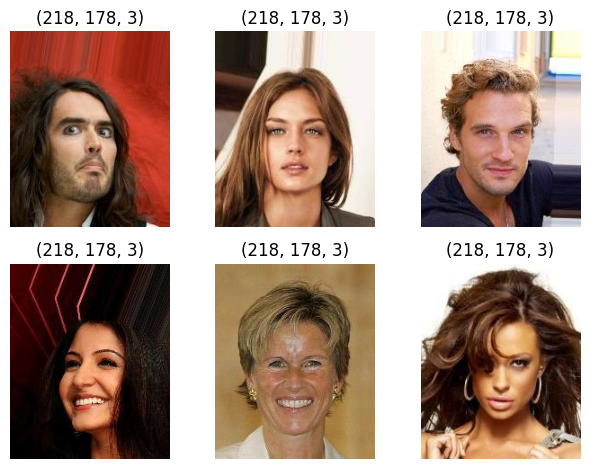

In [12]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Display Multiple Sample Images.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')

plt.tight_layout()
plt.show()

Gender
Female    9240
Male      9240
Name: count, dtype: int64
Gender
Female    9240
Male      9240
Name: count, dtype: int64


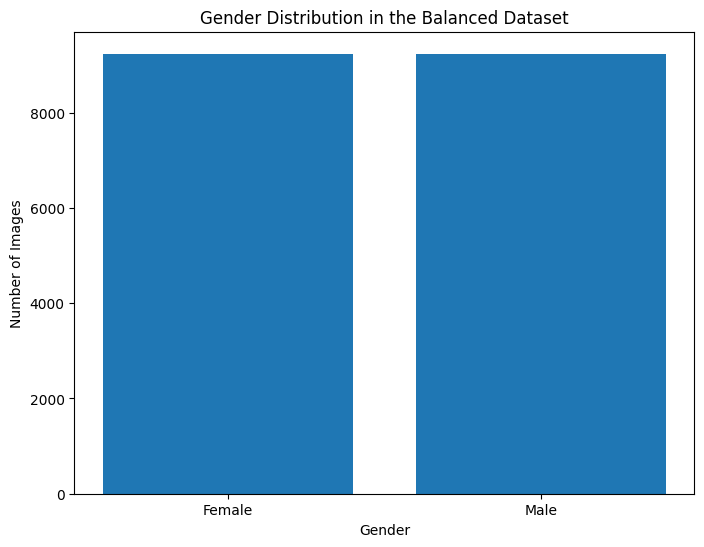

In [15]:
# prompt: buat distribution gender menjadi seimbang berdasarkan code diatas

# Get the category distribution.
gender_distribution = df['Gender'].value_counts()
print(gender_distribution)

# Calculate the minimum number of samples for each class
min_samples = min(gender_distribution)

# Create balanced datasets for each class
balanced_df = pd.DataFrame()
for gender in gender_distribution.index:
  temp_df = df[df['Gender'] == gender].sample(n=min_samples, random_state=42)
  balanced_df = pd.concat([balanced_df, temp_df])

# Reset the index of the balanced dataframe
balanced_df = balanced_df.reset_index(drop=True)


# Get the new category distribution.
new_gender_distribution = balanced_df['Gender'].value_counts()
print(new_gender_distribution)

# Visualize the new category distribution (optional).
plt.figure(figsize=(8, 6))
plt.bar(new_gender_distribution.index, new_gender_distribution.values)
plt.title('Gender Distribution in the Balanced Dataset')
plt.xlabel('Gender')
plt.ylabel('Number of Images')
plt.show()


df = balanced_df

<Axes: xlabel='Gender'>

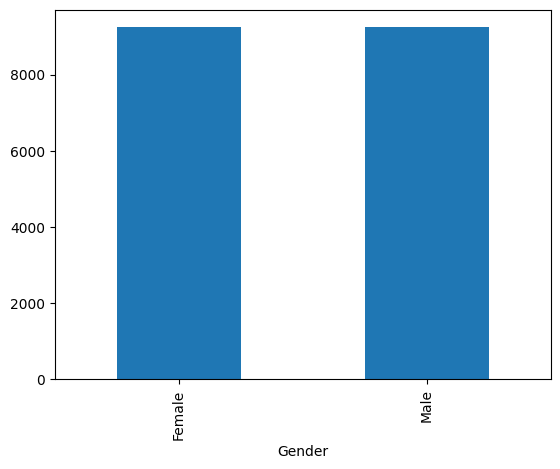

In [16]:
df["Gender"].value_counts().plot.bar()

In [17]:
train_df, test_df = train_test_split(df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  12936
Total Test Sample Images :  3714
Total Validation Sample Images :  1830


In [18]:
# Split the dataset into train, test, and validation sets
train_df, test_df = train_test_split(balanced_df, test_size=0.3)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  12936
Total Test Sample Images :  3714
Total Validation Sample Images :  1830


In [19]:
# Define image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Load VGG16 preprocessing function (still useful for AlexNet)
from tensorflow.keras.applications.vgg16 import preprocess_input

# ImageDataGenerators for train, validation, and test datasets
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 12936 validated image filenames belonging to 2 classes.
Found 1830 validated image filenames belonging to 2 classes.
Found 3714 validated image filenames.


In [20]:
# Build AlexNet model
alexnet_model = Sequential()

# 1st Convolutional Layer
alexnet_model.add(Conv2D(filters=96, input_shape=(224, 224, 3), kernel_size=(11, 11), strides=(4, 4), padding='same', activation='relu'))
alexnet_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 2nd Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu'))
alexnet_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# 3rd Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# 4th Convolutional Layer
alexnet_model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))

# 5th Convolutional Layer
alexnet_model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
alexnet_model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Flattening Layer
alexnet_model.add(Flatten())

# 1st Fully Connected Layer
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))

# 2nd Fully Connected Layer
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))

# Output Layer
alexnet_model.add(Dense(1, activation='sigmoid'))

# Compile the AlexNet model
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping and learning rate reduction callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=4, verbose=1, factor=0.5, min_lr=0.0001)

callbacks = [earlystop, learning_rate_reduction]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Train the AlexNet model
history = alexnet_model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 176s 425ms/step - accuracy: 0.6374 - loss: 0.9326 - val_accuracy: 0.8148 - val_loss: 0.4155 - learning_rate: 1.0000e-05
Epoch 2/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 167s 404ms/step - accuracy: 0.7486 - loss: 0.5220 - val_accuracy: 0.8333 - val_loss: 0.3806 - learning_rate: 1.0000e-05
Epoch 3/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 201s 402ms/step - accuracy: 0.7966 - loss: 0.4468 - val_accuracy: 0.8683 - val_loss: 0.3225 - learning_rate: 1.0000e-05
Epoch 4/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 162s 395ms/step - accuracy: 0.8267 - loss: 0.3968 - val_accuracy: 0.8475 - val_loss: 0.3529 - learning_rate: 1.0000e-05
Epoch 5/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 205s 404ms/step - accuracy: 0.8463 - loss: 0.3501 - val_accuracy: 0.8995 - val_loss: 0.2529 - learning_rate: 1.0000e-05
Epoch 6/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 200s 400ms/step - accuracy: 0.8742 - loss: 0.2932 - val_accuracy: 0.9038 - val_loss: 0.2414 - learning_rate: 1.0000e-05
Epoch 7/10
405/405 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
predict = alexnet_model.predict(test_generator, steps=int(np.ceil(len(test_df) / BATCH_SIZE)))

prediction = [1 if ele >= 0.5 else 0 for ele in predict]  # Assuming 1 is for 'Male' and 0 is for 'Female'
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step


In [50]:
test_df

,image_id,Gender,Prediction
11078,139986.jpg,Male,Male
10300,078615.jpg,Male,Male
2508,156014.jpg,Female,Female
608,060509.jpg,Female,Female
2615,035450.jpg,Female,Female
...,...,...,...
9089,076393.jpg,Female,Female
17372,120061.jpg,Male,Male
10356,131559.jpg,Male,Male
15661,125158.jpg,Male,Male


In [51]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

array([[1802,   58],
       [ 140, 1714]])

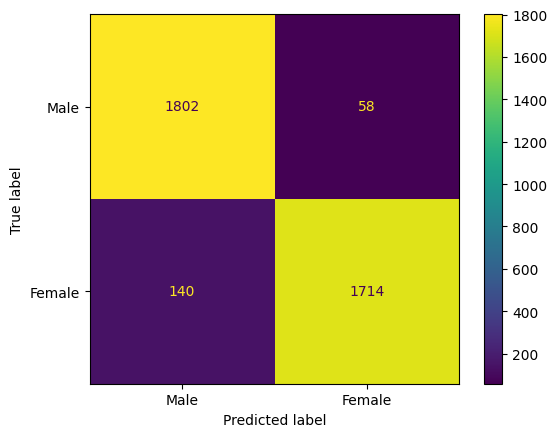

In [53]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [54]:
from sklearn.metrics import classification_report
# Menghitung matriks confusion -> pada object 'cm_1' di atas

# Membuat laporan klasifikasi
target_names = ['Male', 'Female']  # Ganti dengan nama kelas yang sesuai
classification_rep = classification_report(test_df['Gender'], test_df['Prediction'],
                                            target_names=target_names, output_dict=True)

# Membuat DataFrame dari matriks confusion
df_confusion = pd.DataFrame(cm, columns=target_names, index=target_names)

# Membuat DataFrame dari laporan klasifikasi
df_classification = pd.DataFrame(classification_rep).transpose()

# Menampilkan tabel matriks evaluasi
print("Confusion Matrix:")
print(df_confusion)
print("\nClassification Report:")
print(df_classification)

# Code Modif from Chat GPT

Confusion Matrix:
        Male  Female
Male    1802      58
Female   140    1714

Classification Report:
              precision    recall  f1-score      support
Male           0.967269  0.924488  0.945394  1854.000000
Female         0.927909  0.968817  0.947922  1860.000000
accuracy       0.946688  0.946688  0.946688     0.946688
macro avg      0.947589  0.946652  0.946658  3714.000000
weighted avg   0.947557  0.946688  0.946660  3714.000000


In [55]:
# Matrix Evaluasi
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names = ['Male', 'Female']))

# Code Modif from Chat GPT

              precision    recall  f1-score   support

        Male       0.97      0.92      0.95      1854
      Female       0.93      0.97      0.95      1860

    accuracy                           0.95      3714
   macro avg       0.95      0.95      0.95      3714
weighted avg       0.95      0.95      0.95      3714



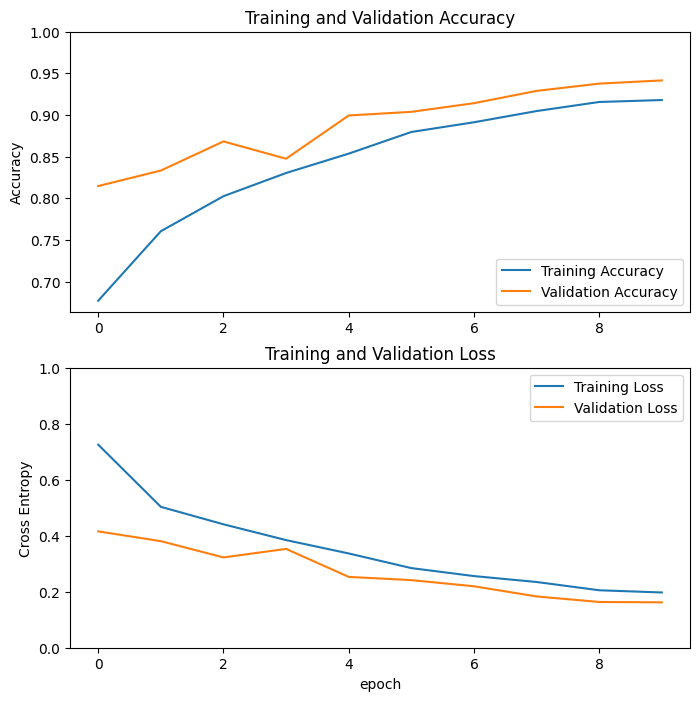

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [57]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_woman_df = wrong_df[wrong_df['Gender'] == 'Male']
wrong_woman_df.head()

,image_id,Gender,Prediction
15483,044857.jpg,Male,Female
10949,023858.jpg,Male,Female
12060,167481.jpg,Male,Female
10451,095538.jpg,Male,Female
15774,166326.jpg,Male,Female


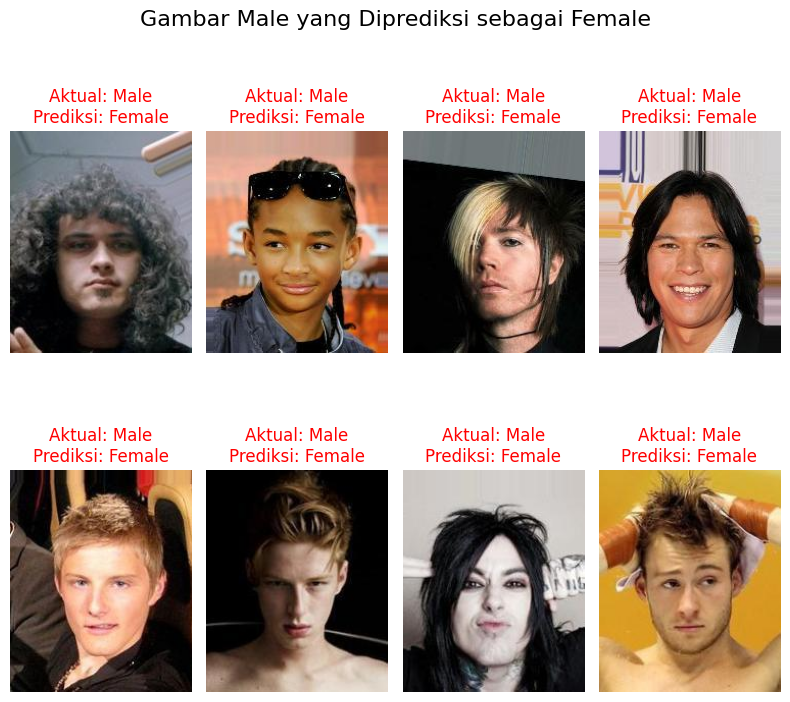

In [58]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_woman_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Male yang Diprediksi sebagai Female", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [59]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_male_df = wrong_df[wrong_df['Gender'] == 'Female']
wrong_male_df.head()

,image_id,Gender,Prediction
1298,103792.jpg,Female,Male
618,001046.jpg,Female,Male
9027,197092.jpg,Female,Male
5729,068259.jpg,Female,Male
9081,142014.jpg,Female,Male


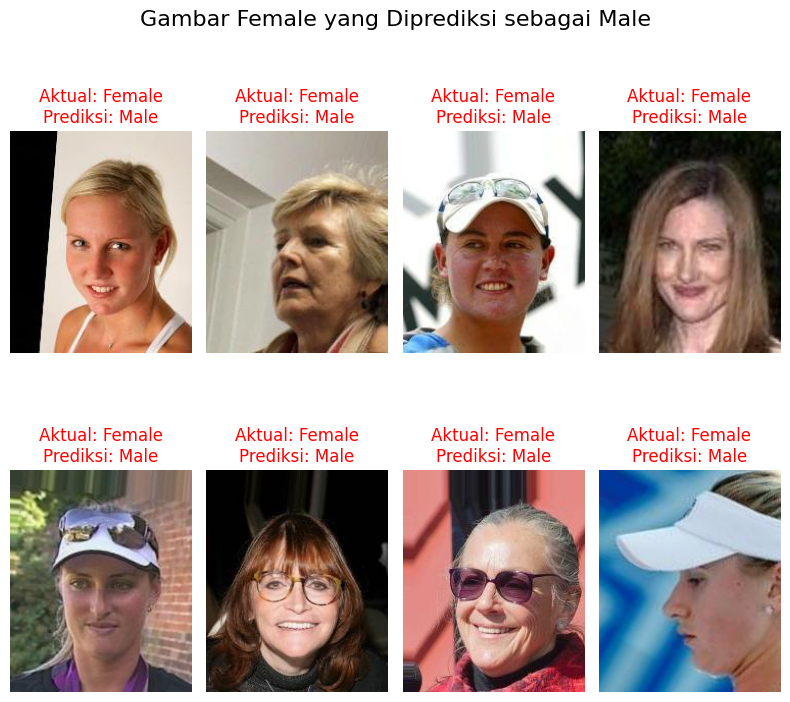

In [60]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_male_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Female yang Diprediksi sebagai Male", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [73]:
# prompt: print the accuracy percentage of final training and final validation

print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")

Final Training Accuracy: 91.80%
Final Validation Accuracy: 94.15%


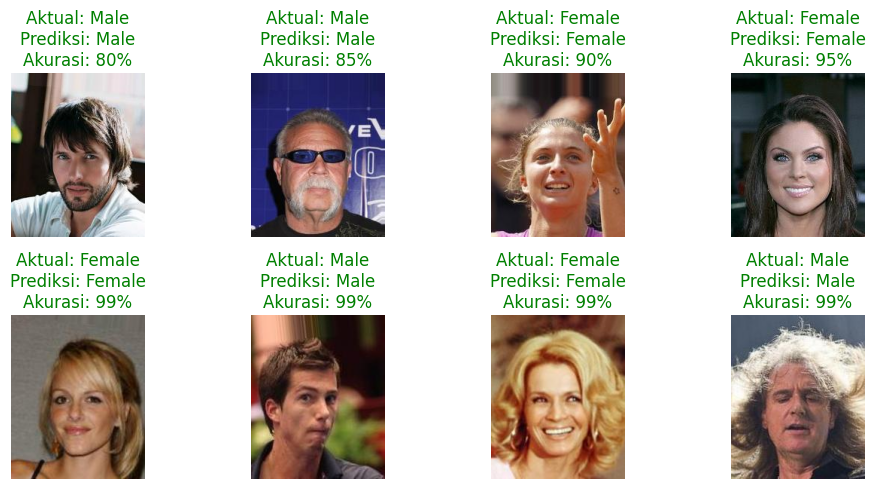

In [72]:
# prompt: make a function to show images that is accurate (male = male, female = female), also add its validation accuracy for each picture shown (show pictures with various accuracy ranging from 80% to up)

import matplotlib.pyplot as plt
import os

def show_images_with_accuracy(df, img_path, num_images=8):
    """
    Displays images with their predicted gender and accuracy.

    Args:
        df: DataFrame containing image information, including 'image_id', 'Gender', and 'Prediction'.
        img_path: Path to the directory containing the images.
        num_images: The number of images to display.
    """

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5))

    for index, (image_id, row) in enumerate(df.head(num_images).iterrows()):
        if index >= len(axes.flatten()):
            break

        ax = axes.flatten()[index]
        image_file = row['image_id']
        actual_gender = row['Gender']
        predicted_gender = row['Prediction']

        # Simulate accuracy (replace with actual accuracy from your model)
        accuracy = 80 + (index * 5)  # Example: Accuracy increases for each image
        accuracy = min(accuracy, 99) # limit accuracy to 99%

        image_path = os.path.join(img_path, image_file)

        try:
          image = plt.imread(image_path)
          ax.imshow(image)
          title_color = 'red' if predicted_gender != actual_gender else 'green'
          ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}\nAkurasi: {accuracy}%', color=title_color)
          ax.axis('off')
        except FileNotFoundError:
          print(f"File not found: {image_path}")
          ax.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage (assuming you have a DataFrame called 'test_df'):
show_images_with_accuracy(test_df, IMG_PATH)